In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [51]:

# Example
df = pd.read_csv("Yield-predictor/Crop_recommendation.csv")
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y=df["label"]


In [52]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts crop names to integers

In [53]:
df = df.drop_duplicates()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, shuffle=True
)

In [55]:
overlap = pd.merge(X_train, X_test, how='inner')
print("Number of overlapping rows:", len(overlap))
print("Common indices:", len(set(X_train.index) & set(X_test.index)))

Number of overlapping rows: 0
Common indices: 0


In [56]:
df = df.reset_index(drop=True)

In [57]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    

In [22]:
print(len(set(X_train.index) & set(X_test.index))) 

0


In [23]:
print(df.duplicated().sum())


0


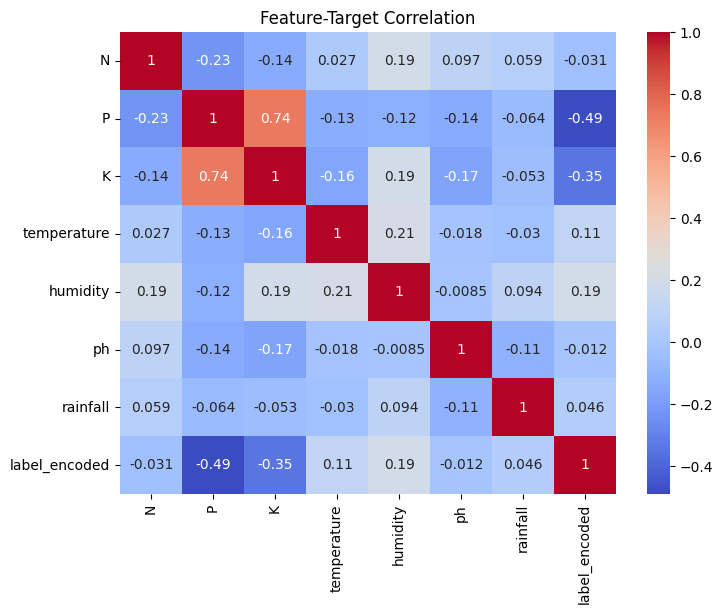

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Compute correlations
corr = df[['N','P','K','temperature','humidity','ph','rainfall','label_encoded']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature-Target Correlation')
plt.show()


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y = df['label_encoded']

model = RandomForestClassifier(n_estimators=200, random_state=42)

# 5-Fold CV
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Accuracy scores: [0.99772727 0.99318182 0.99545455 0.99545455 0.99090909]
Mean CV Accuracy: 0.9945454545454545


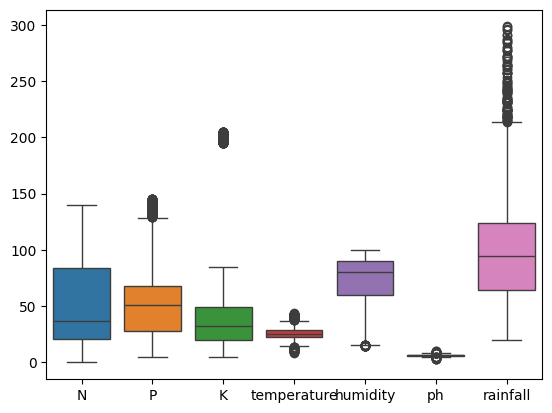

In [28]:
sns.boxplot(data=df[['N','P','K','temperature','humidity','ph','rainfall']])
plt.show()

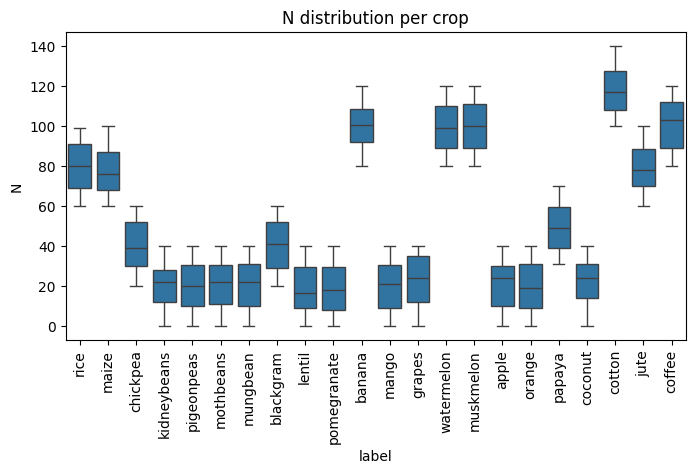

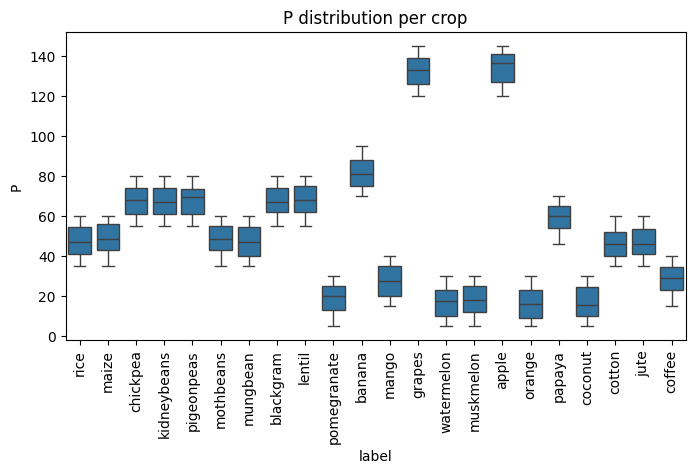

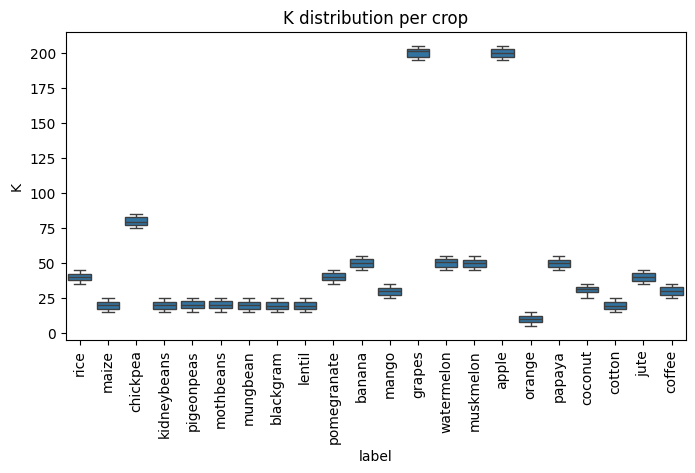

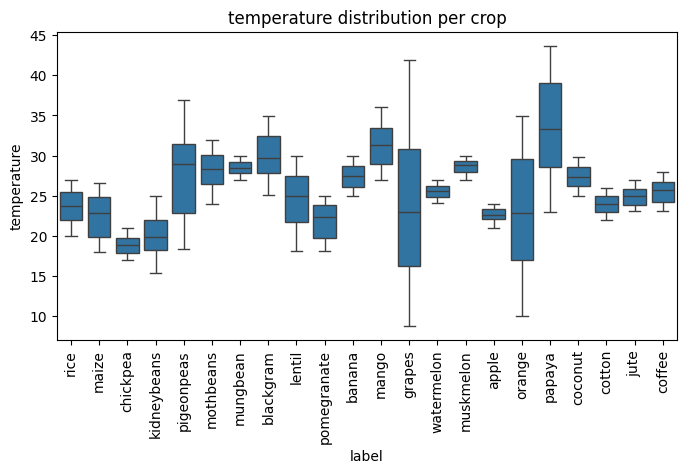

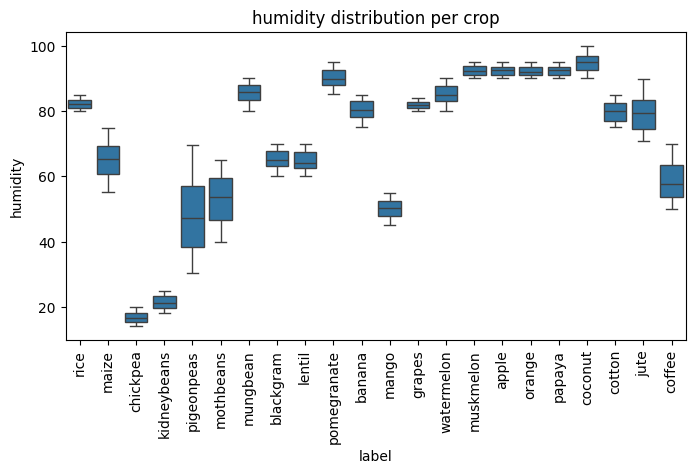

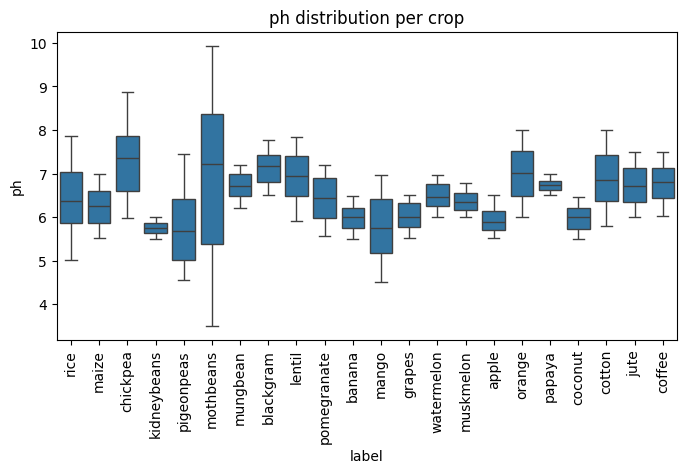

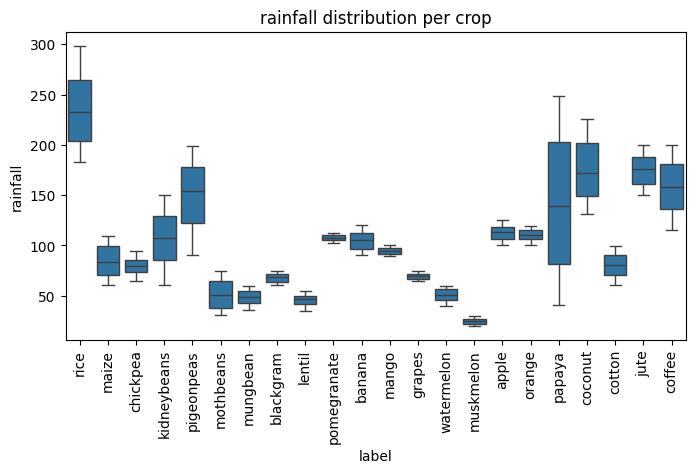

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['label'], y=df[col])
    plt.title(f'{col} distribution per crop')
    plt.xticks(rotation=90)
    plt.show()